# Mid-semester assignment - Deep Learning
Hello dear students,<br> This is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Harel Meir 205588940
<br>
Student 2: Aviad Korngut 206777724

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Part 1 : Neural Network in plain NumPy (50%)

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
orig_x = X
orig_y = y

## Data preprocessing (5%)

In [ ]:
X = orig_x
y = orig_y

### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
# convert to int array.
temp_y = y.astype(np.float64)

#chosen indexes
idx1 = 3
idx2 = 4

# list of indexes with different lables to ignore
indexes_to_delete =[]

# adding the indexes to the arr
for i,num in enumerate(temp_y):
  if num != idx1 and num != idx2:
    indexes_to_delete.append(i)


#deleting the elemnts
X = np.delete(X, indexes_to_delete, axis=0).astype(np.float64)
y = np.delete(temp_y, indexes_to_delete, axis=0)

y = np.where(y == 3, 0, 1)



# prints the shapes
print(X.shape)
print(y.shape)













(14000, 784)
(14000,)


### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
# noamalize and transpose.
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape)


(784, 14000)
(1, 14000)


### Split the data into Train set and Test set
For this part, you will need to implement a function that will shuffle the data in a random order. Note that you keep a matching order in Y (the label).

In [ ]:
def data_shuffle(X, Y):
  permutation = np.random.permutation(X1.shape[1])
  X = X[:,permutation]
  Y = Y[:,permutation]
  return X,Y

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

X = X1
Y = y1

# Use shuffle on the train data
X, y = data_shuffle(X, Y)


# taking 0.8 as train, 0.2 as test
PORTION = 0.8
train_size = int(0.8 * X.shape[1])

X_train, X_test = X[:,:train_size], X[:,train_size:X.shape[1]]
Y_train, Y_test = y[:,:train_size].T, y[:,train_size:y.shape[1]].T


### Test yourself

73


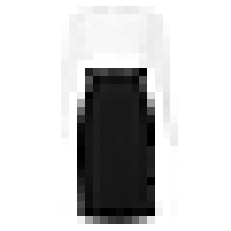

0

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
print(i)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (5%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
  ret_arr = np.where(z < 0, np.exp(z) / (1+np.exp(z)), 1/(1+np.exp(-z)))
  return ret_arr


In [ ]:
def sigmoid_d(z):
  s = sigmoid(z)
  return s*(1-s)

## Loss function (10%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    # if they are equal - return 0.
    if y_hat == y:
      return 0

    # if y is 0 return only the part that doesnt get 0.
    if y == 0:
        return -(np.log(1.0-y_hat))
    # if y == 1:
    return -(np.log(y_hat))
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''


## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 256
learning_rate = 0.04
epochs = 5

## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(256, 784)
(256, 1)
(1, 256)
(1, 1)


## Training (15%)

In [ ]:
X = X_train
Y = Y_train

loss_list = []
epoch_list = []
# number of elements in training set.
numOfTraining = X.shape[1]

print(numOfTraining)

11200


In [ ]:
for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):

    # TODO :  Forward propagation
    # getting the x val.
    x_val = np.expand_dims(X[:,j], axis=1)
    Z1 = np.matmul(W1,x_val) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y[j,0]

    # TODO: Compute loss
    loss = log_loss( A2[0][0], Yout,j)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    dZ2 = (A2-Yout)             #d(loss)/d(z2)
    dW2 = np.matmul(dZ2, A1.T)           #d(loss) * d(Z2)/d(W2)           
    db2 = dZ2                     #d(loss)/d(d2) * d(z2)/d(b2)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_d(Z1)
    dW1 = np.matmul(dZ1, x_val.T)
    db1 = dZ1

    # TODO: Update weights
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate

  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.24792227366492856
Epoch 1  Loss: 0.17019796296479775
Epoch 2  Loss: 0.14096817290332564
Epoch 3  Loss: 0.125906427664426
Epoch 4  Loss: 0.11080410293512229


## Results of part 1

### Loss Visualization

[0, 1, 2, 3, 4]
[0.24792227366492856, 0.17019796296479775, 0.14096817290332564, 0.125906427664426, 0.11080410293512229]


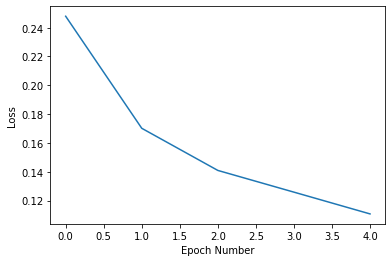

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
print(epoch_list)
print(loss_list)
plt.plot(epoch_list, loss_list)

### Test your performance (15%)

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))


# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

# Print the confusion matrix In order to test your performance
matrix = confusion_matrix(predictions.T, labels.T)
print(matrix)

# calculate accuricy:
tn,fp= matrix[0]
fn,tp = matrix[1]

acc = (tn+tp) / (tn+tp+fn+fp)
print(f"The Accuracy score is: {acc} %")




[[1338   95]
 [  38 1329]]
The Accuracy score is: 0.9525 %


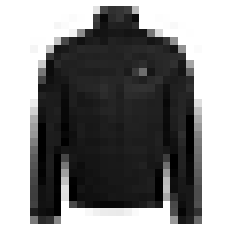

1
Real= 1 Predicted= 0.999997076609088


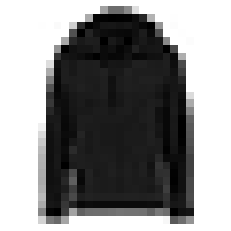

1
Real= 1 Predicted= 0.999971353074787


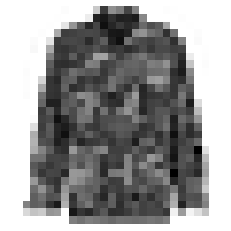

1
Real= 1 Predicted= 0.9989438523032318


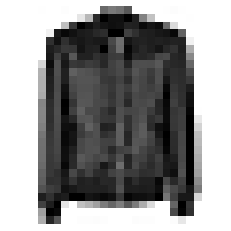

1
Real= 1 Predicted= 0.9999447322548409


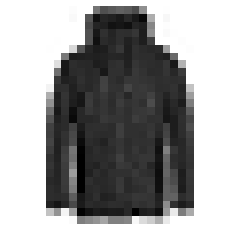

1
Real= 1 Predicted= 0.9998580548808439


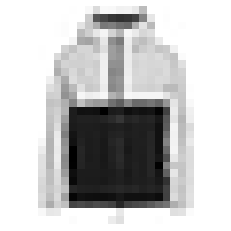

1
0
Real= 1 Predicted= 0.065162302317088


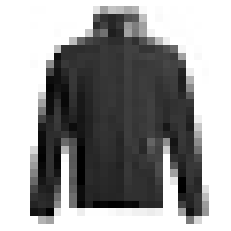

1
Real= 1 Predicted= 0.9999823827199189


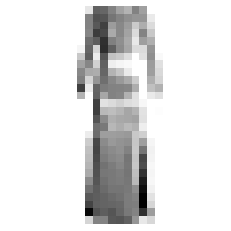

0
0
Real= 0 Predicted= 2.2163092962527275e-05


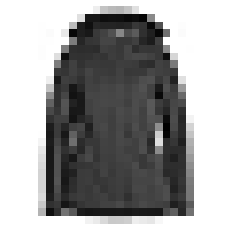

1
Real= 1 Predicted= 0.9994951736201815


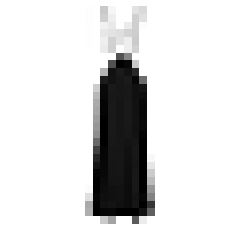

0
0
Real= 0 Predicted= 8.475259266786485e-07


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

for j in range(10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  print(Y_test[i,0])

  x_val2 = np.expand_dims(X[:,i], axis=1)
  Z1 = np.matmul(W1,x_val2) + b1 
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2[0,0])

# Part 2 : Neural Network with Tensorflow Keras (50%)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

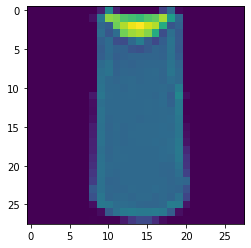

In [ ]:


fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[2])
plt.show()

## Data preprocessing

### Feature scaling

In [ ]:


# dividing the training and testing sets by 255(normalizing)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# reshaping to preper for training.
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Select two classes

In [ ]:


# the classes We have chosen are 4(pullover) and coat(2)
class_1 = 3
class_2 = 4

# getting only the valus of the two
X_train = X_train[(y_train == class_1) | (y_train == class_2)]
y_train = y_train[(y_train == class_1) | (y_train == class_2)]
X_test = X_test[(y_test == class_1) | (y_test == class_2)]
y_test = y_test[(y_test == class_1) | (y_test == class_2)]

original_y_test = y_test

print(y_test.shape)


(2000,)



We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:


from keras.utils import np_utils
# convert labels to binary classification (class_1: 0, class_2: 1)
y_train = keras.utils.to_categorical(y_train == class_2, num_classes=2)
y_test = keras.utils.to_categorical(y_test == class_2, num_classes=2)

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:


from keras.models import Sequential
from keras.layers import Flatten, Dense

model2 = Sequential()

# add input layer
model2.add(Dense(units=256, activation = "sigmoid", input_shape=(784,), use_bias = True))

model2.add(Dense(units=64,activation="sigmoid"))

# add hidden layer
model2.add(Dense(units=2, activation = "softmax"))



### Experiment 1 model
Build Second model with one additional layer of sigmoid

In [ ]:

model3 = Sequential()
# add input layer
model3.add(Dense(units=512, activation = "sigmoid", input_shape=(784,), use_bias = True))

model3.add(Dense(units=128,activation="relu"))


# add hidden layer
model3.add(Dense(units=2, activation = "softmax"))

### Experiment 2 model

In [ ]:


model4 = Sequential()
# add input layer
model4.add(Dense(units=256, activation = "sigmoid", input_shape=(784,), use_bias = True))

model4.add(Dense(units=64, activation = "sigmoid"))

# add hidden layer
model4.add(Dense(units=2, activation = "softmax"))

### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:


from keras.optimizers import Adam
from keras.optimizers import SGD
opt_adam = Adam(learning_rate=0.00004)
opt_sgd = SGD(learning_rate=0.01)


model2.compile(loss='categorical_crossentropy', optimizer=opt_sgd,metrics=["accuracy"])
model3.compile(loss='categorical_crossentropy', optimizer=opt_sgd,metrics=["accuracy"])

model4.compile(loss='categorical_crossentropy', optimizer=opt_adam,metrics=["accuracy"])

### Training
Use the fit method to train your model, then store the results within the variable "history".


####Base model

In [ ]:
temp_x = X_train
temp_y = y_train

history = model2.fit(temp_x,temp_y, epochs=10, validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1230 - accuracy: 0.9510 - val_loss: 0.1257 - val_accuracy: 0.9479
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9522 - val_loss: 0.1247 - val_accuracy: 0.9488
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1204 - accuracy: 0.9514 - val_loss: 0.1234 - val_accuracy: 0.9475
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1195 - accuracy: 0.9519 - val_loss: 0.1238 - val_accuracy: 0.9475
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9523 - val_loss: 0.1219 - val_accuracy: 0.9488
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1177 - accuracy: 0.9534 - val_loss: 0.1229 - val_accuracy: 0.9479
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9526 - val_loss: 0.1267 - val_accuracy: 0.9442
Epoch 

####Expermient 1

In [ ]:
temp_x = X_train
temp_y = y_train


history2 = model3.fit(temp_x, temp_y, epochs=10, validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3218 - accuracy: 0.8849 - val_loss: 0.2134 - val_accuracy: 0.9133
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1986 - accuracy: 0.9170 - val_loss: 0.1747 - val_accuracy: 0.9296
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1682 - accuracy: 0.9279 - val_loss: 0.1518 - val_accuracy: 0.9392
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.1493 - accuracy: 0.9379 - val_loss: 0.1386 - val_accuracy: 0.9417
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1391 - accuracy: 0.9416 - val_loss: 0.1313 - val_accuracy: 0.9454
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1303 - accuracy: 0.9459 - val_loss: 0.1318 - val_accuracy: 0.9492
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9477 - val_loss: 0.1326 - val_accuracy: 0.9396
Epoch 

####Experiment 2

In [ ]:
temp_x = X_train
temp_y = y_train
history3 = model4.fit(temp_x, temp_y, epochs=10, validation_split=0.2,batch_size=64,shuffle=True)

Epoch 1/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6435 - accuracy: 0.6817 - val_loss: 0.4924 - val_accuracy: 0.8933
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.9005 - val_loss: 0.3368 - val_accuracy: 0.9000
Epoch 3/10
150/150 [==============================] - 1s 3ms/step - loss: 0.2988 - accuracy: 0.9073 - val_loss: 0.2633 - val_accuracy: 0.9108
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9123 - val_loss: 0.2257 - val_accuracy: 0.9200
Epoch 5/10
150/150 [==============================] - 1s 4ms/step - loss: 0.2157 - accuracy: 0.9174 - val_loss: 0.2027 - val_accuracy: 0.9267
Epoch 6/10
150/150 [==============================] - 1s 3ms/step - loss: 0.1948 - accuracy: 0.9241 - val_loss: 0.1848 - val_accuracy: 0.9321
Epoch 7/10
150/150 [==============================] - 1s 3ms/step - loss: 0.1782 - accuracy: 0.9303 - val_loss: 0.1707 - val_accuracy: 0.9362
Epoch 

### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
%%script echo skipping

from google.colab import files

!mkdir -p my_models

model2.save('my_models/model2')
model3.save('my_models/model3')
model4.save('my_models/model4')

!zip -r /content/my_models.zip /content/my_models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Loss and Accuracy Visualization
Show  on plot the lose during training

####Loss

#####Base_Model





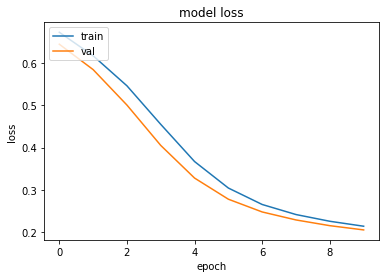

In [ ]:


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#####Experiment 1

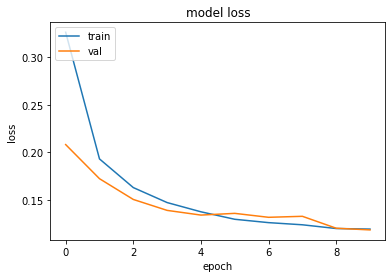

In [ ]:

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#####Experiment 2

Show  on plot the accuracy during training

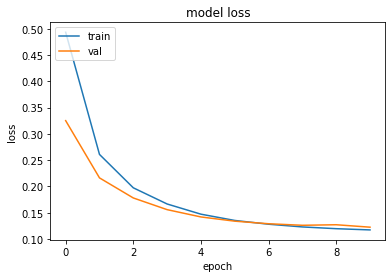

In [ ]:


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Accuarcy

#####Base_model

In [ ]:
%%script echo skipping

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch num')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

skipping


#####Experiment 1

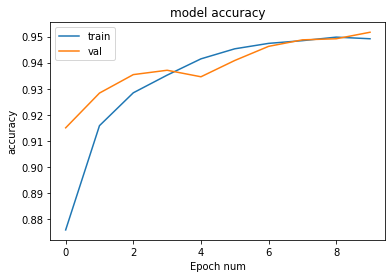

In [ ]:


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch num')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#####Experiment 2

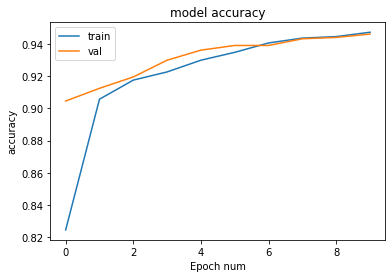

In [ ]:


plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch num')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

####Base Model


In [ ]:


from sklearn.metrics import accuracy_score


y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = np.where(y_pred == 0, 3, 4)

acc = accuracy_score(original_y_test, y_pred)
print(f"The Accuracy score is: {acc}")

63/63 [==============================] - 0s 2ms/step
The Accuracy score is: 0.937


####Experiment 1


In [ ]:


y_pred2 = model3.predict(X_test)
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2 = np.where(y_pred2 == 0, 3, 4)

acc2 = accuracy_score(original_y_test, y_pred2)
print(acc2)

63/63 [==============================] - 0s 2ms/step
0.9455


####Experiment 2


In [ ]:


y_pred3 = model4.predict(X_test)
y_pred3 = np.argmax(y_pred3, axis=1)
y_pred3 = np.where(y_pred3 == 0, 3, 4)

acc3 = accuracy_score(original_y_test, y_pred3)
print(acc3)

63/63 [==============================] - 0s 2ms/step
0.948


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

####Base Model


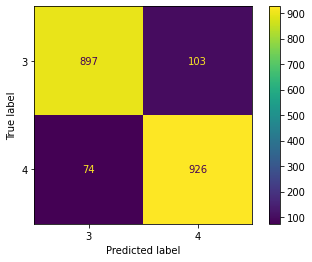

In [ ]:
%%script echo skipping

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

conf = confusion_matrix(original_y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=[3, 4])
disp.plot()
plt.show()


####Experiment 1

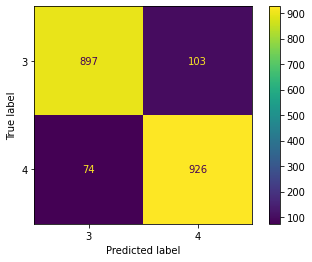

In [ ]:
%%script echo skipping

conf2 = confusion_matrix(original_y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf2, display_labels=[3, 4])
disp2.plot()
plt.show()

####Experiment 2

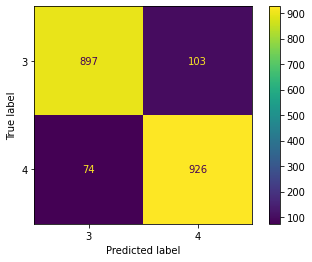

In [ ]:
%%script echo skipping

conf3 = confusion_matrix(original_y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=conf3, display_labels=[3, 4])
disp3.plot()
plt.show()

## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

In [ ]:
import tensorflow as tf
from tensorflow import keras
import json

### Load trained model

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1J8aT0p2Myx156li93rgstMrxJVIa2p2F?usp=share_link -O /loaded_models
loaded_model = tf.keras.modles.load_model('/loaded_models/modle4')
loaded_model.summary()

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

### Predicting the result of a single observation


In [ ]:
def single_predictor(sample):
  my_prediction = loaded_model.predict(sample)
  print(my_prediction > 0.5)

#### Test model

Enter below the test sample

In [ ]:
sample = # Test sample

In [ ]:
single_predictor(sample)